In [1]:
import networkx as nx

In [5]:
import nxviz as nv
import matplotlib.pyplot as plt
import numpy as np

In [23]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3,4,5,6,7,8])
G.add_edges_from([(1, 2), (1, 3), (2,4), (2,5), (6,8), (5,7)])

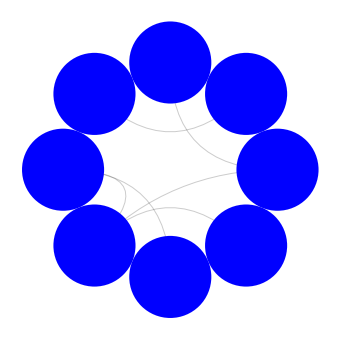

In [28]:
c = nv.CircosPlot(G)
#c = CircosPlot(G, node_color='bipartite',node_grouping='bpartite',node_order='centrality')
c.draw()
plt.show()

In [58]:
G_2 = nx.Graph()
numbers = range(12)
G_2.add_nodes_from(numbers, bipartite ='customers')
letters = ['a','b', 'c','d','e']
G_2.add_nodes_from(letters, bipartite ='products')

In [59]:
G_2.nodes(data = True)

NodeDataView({0: {'bipartite': 'customers'}, 1: {'bipartite': 'customers'}, 2: {'bipartite': 'customers'}, 3: {'bipartite': 'customers'}, 4: {'bipartite': 'customers'}, 5: {'bipartite': 'customers'}, 6: {'bipartite': 'customers'}, 7: {'bipartite': 'customers'}, 8: {'bipartite': 'customers'}, 9: {'bipartite': 'customers'}, 10: {'bipartite': 'customers'}, 11: {'bipartite': 'customers'}, 'a': {'bipartite': 'products'}, 'b': {'bipartite': 'products'}, 'c': {'bipartite': 'products'}, 'd': {'bipartite': 'products'}, 'e': {'bipartite': 'products'}})

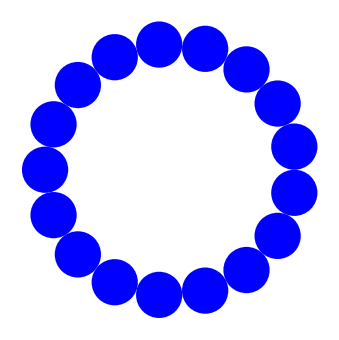

In [60]:
D = nv.CircosPlot(G_2)
D.draw()
plt.show()

In [61]:
cust_nodes = [n for n, d in G_2.nodes(data = True) if d['bipartite'] == 'customers']

In [62]:
cust_nodes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [68]:
nx.bipartite.degree_centrality(G_2, cust_nodes)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 'a': 0.0,
 'd': 0.0,
 'c': 0.0,
 'e': 0.0,
 'b': 0.0}

In [69]:
def get_nodes_from_partition(G_2,partition):
    nodes = []
        # Iterate over each node in the graph G
    for n in G_2:
        # Check that the node belongs to the particular partition
        if G_2.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

print(len(get_nodes_from_partition(G_2, 'customers')))
print(len(get_nodes_from_partition(G_2, 'products')))

12
5


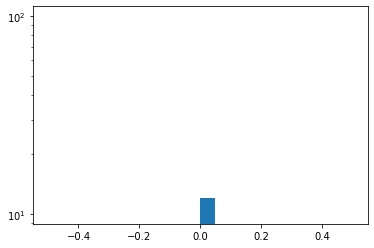

In [65]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G_2, 'customers')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G_2)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

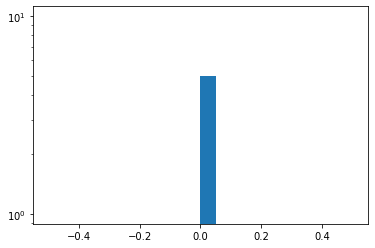

In [70]:
# Get the 'projects' nodes: project_nodes
product_nodes = get_nodes_from_partition(G_2, 'products')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G_2)

# Get the degree centralities for project_nodes: project_dcs
product_dcs = [dcs[n] for n in product_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(product_dcs, bins=20)
plt.show()